In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import sys
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from matplotlib import pyplot as plt

In [3]:
# set attack column in each attack csv file
path = "/content/drive/MyDrive/MQTT_final/tranalyzer_csv_files/"
file_names = ["attack1_flows.csv","attack3_flows.csv","attack4_flows.csv","attack5_flows.csv","attack6_flows.csv","attack8_flows.csv"]
for file in file_names:
  df = pd.read_csv(path + file)
  print(file)
  attack = []
  for value in df['srcIP']:
    # print(value, value.split('.'))
    if value.split('.')[0] == '157':
      attack.append(1)
    else:
      attack.append(0)
  df['attack'] = attack
  # print(df.head())
  df.to_csv(path + 'modif_' + file, index = False)

attack1_flows.csv
attack3_flows.csv


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (102,104,106) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


attack4_flows.csv
attack5_flows.csv
attack6_flows.csv
attack8_flows.csv


In [4]:
# combine all flow files into a single dataframe
path = "/content/drive/MyDrive/MQTT_final/tranalyzer_csv_files/"
file_names = ["modif_attack1_flows.csv","modif_attack3_flows.csv","modif_attack4_flows.csv","modif_attack5_flows.csv","modif_attack6_flows.csv","modif_attack8_flows.csv"]
main_df = pd.DataFrame()
attack_type = 1
for file in file_names:
  attack = []
  curr_dataframe = pd.read_csv(path+file)
  #iterate over all rows in curr data frame and add an extra column to the data frame, whose value = attack_type if last column value is 1 else 0
  for value in curr_dataframe["attack"]:
    if value == 0:
      attack.append(0)
    elif value == 1:
      attack.append(attack_type)
  curr_dataframe["attack_type"] = attack
  attack_type = attack_type+1
  main_df = main_df.append(curr_dataframe,ignore_index = True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (102,104,106) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
main_df.shape
print(main_df.columns)

Index(['%dir', 'flowInd', 'flowStat', 'timeFirst', 'timeLast', 'duration',
       'numHdrDesc', 'numHdrs', 'hdrDesc', 'srcMac',
       ...
       'mqttClientID', 'mqttConAck', 'mqttTopic', 'connSip', 'connDip',
       'connSipDip', 'connSipDprt', 'connF', 'attack', 'attack_type'],
      dtype='object', length=114)


In [6]:
main_df.info()
cols = main_df.columns
for col in cols:
  print(col, end = ',')
  if col == 'dstPort' or col == 'minIAT' or col == 'ip6OptHH_D' or col == 'tcpMaxWinSz' or col == 'tcpTmS' or col == 'icmpStat' or col == 'connDip':
    print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243030 entries, 0 to 243029
Columns: 114 entries, %dir to attack_type
dtypes: float64(24), int64(53), object(37)
memory usage: 211.4+ MB
%dir,flowInd,flowStat,timeFirst,timeLast,duration,numHdrDesc,numHdrs,hdrDesc,srcMac,dstMac,ethType,srcIP,srcIPCC,srcIPOrg,srcPort,dstIP,dstIPCC,dstIPOrg,dstPort,

l4Proto,macStat,macPairs,srcMac_dstMac_numP,dstPortClassN,dstPortClass,numPktsSnt,numPktsRcvd,numBytesSnt,numBytesRcvd,minPktSz,maxPktSz,avePktSize,stdPktSize,minIAT,

maxIAT,aveIAT,stdIAT,pktps,bytps,pktAsm,bytAsm,tcpFStat,ipMindIPID,ipMaxdIPID,ipMinTTL,ipMaxTTL,ipTTLChg,ipToS,ipFlags,ipOptCnt,ipOptCpCl_Num,ip6OptCntHH_D,ip6OptHH_D,

tcpISeqN,tcpPSeqCnt,tcpSeqSntBytes,tcpSeqFaultCnt,tcpPAckCnt,tcpFlwLssAckRcvdBytes,tcpAckFaultCnt,tcpBFlgtMx,tcpInitWinSz,tcpAveWinSz,tcpMinWinSz,tcpMaxWinSz,

tcpWinSzDwnCnt,tcpWinSzUpCnt,tcpWinSzChgDirCnt,tcpWinSzThRt,tcpFlags,tcpAnomaly,tcpOptPktCnt,tcpOptCnt,tcpOptions,tcpMSS,tcpWS,tcpMPTBF,tcpMPF,tcpMPAID,t

In [7]:
print(main_df['attack'].unique())
print(main_df['attack_type'].value_counts())

[0 1]
0    133840
3    100494
4      2488
5      1963
6      1626
1      1481
2      1138
Name: attack_type, dtype: int64


In [8]:
main_df.head()

,%dir,flowInd,flowStat,timeFirst,timeLast,duration,numHdrDesc,numHdrs,hdrDesc,srcMac,...,mqttClientID,mqttConAck,mqttTopic,connSip,connDip,connSipDip,connSipDprt,connF,attack,attack_type
0,A,4,0x0400000000004000,1.643436e+09,1.643436e+09,0.067943,1,3,eth:ipv4:tcp,42:01:0a:b6:00:01,...,NaN,0x00,NaN,1,3,4,4,4.0,0,0
1,B,4,0x0400000000004001,1.643436e+09,1.643436e+09,0.000093,1,3,eth:ipv4:tcp,42:01:0a:b6:00:03,...,NaN,0x00,NaN,3,1,3,3,1.0,0,0
2,A,6,0x0400000000004000,1.643436e+09,1.643436e+09,0.030442,1,3,eth:ipv4:tcp,42:01:0a:b6:00:01,...,NaN,0x00,NaN,1,3,4,4,4.0,0,0
3,B,6,0x0400000000004001,1.643436e+09,1.643436e+09,0.000068,1,3,eth:ipv4:tcp,42:01:0a:b6:00:03,...,NaN,0x00,NaN,3,1,3,3,1.0,0,0
4,A,7,0x0400000000004000,1.643436e+09,1.643436e+09,1.065499,1,3,eth:ipv4:tcp,42:01:0a:b6:00:01,...,B80MJZHREG,0x00,test,1,3,4,4,4.0,0,0


In [9]:
nunique = main_df.nunique()
cols_to_drop = nunique[nunique == 1].index
main_df.drop(cols_to_drop, axis=1, inplace = True)
print(main_df.shape)
print(main_df.columns)

(243030, 98)
Index(['%dir', 'flowInd', 'flowStat', 'timeFirst', 'timeLast', 'duration',
       'numHdrs', 'hdrDesc', 'srcMac', 'dstMac', 'ethType', 'srcIP', 'srcIPCC',
       'srcIPOrg', 'srcPort', 'dstIP', 'dstIPCC', 'dstIPOrg', 'dstPort',
       'l4Proto', 'srcMac_dstMac_numP', 'dstPortClassN', 'dstPortClass',
       'numPktsSnt', 'numPktsRcvd', 'numBytesSnt', 'numBytesRcvd', 'minPktSz',
       'maxPktSz', 'avePktSize', 'stdPktSize', 'maxIAT', 'aveIAT', 'stdIAT',
       'pktps', 'bytps', 'pktAsm', 'bytAsm', 'tcpFStat', 'ipMindIPID',
       'ipMaxdIPID', 'ipMinTTL', 'ipMaxTTL', 'ipTTLChg', 'ipToS', 'ipFlags',
       'tcpISeqN', 'tcpPSeqCnt', 'tcpSeqSntBytes', 'tcpSeqFaultCnt',
       'tcpPAckCnt', 'tcpFlwLssAckRcvdBytes', 'tcpAckFaultCnt', 'tcpBFlgtMx',
       'tcpInitWinSz', 'tcpAveWinSz', 'tcpMinWinSz', 'tcpMaxWinSz',
       'tcpWinSzDwnCnt', 'tcpWinSzUpCnt', 'tcpWinSzChgDirCnt', 'tcpFlags',
       'tcpAnomaly', 'tcpOptPktCnt', 'tcpOptCnt', 'tcpOptions', 'tcpMSS',
       'tcpWS', 't

In [10]:
cols_to_drop = ['connSip','connDip','connSipDip','connSipDprt','connF','timeFirst','timeLast','tcpBtm','tcpUtm','tcpTmER','tcpTmS','flowInd','hdrDesc','srcMac','dstMac','srcIP','srcIPCC','srcIPOrg','srcPort','dstIP','dstIPCC','dstIPOrg','dstPort','srcMac_dstMac_numP','dstPortClass','tcpISeqN','mqttClientID','mqttTopic','icmpBFTypH_TypL_Code']
print(len(cols_to_drop))

29


In [11]:
main_df.drop(cols_to_drop, axis = 1, inplace = True)
main_df.shape

(243030, 69)

In [12]:
main_df.head(10)

,%dir,flowStat,duration,numHdrs,ethType,l4Proto,dstPortClassN,numPktsSnt,numPktsRcvd,numBytesSnt,...,tcpStatesAFlags,icmpStat,icmpTCcnt,icmpEchoSuccRatio,mqttStat,mqttCPT,mqttProtoLevel,mqttConAck,attack,attack_type
0,A,0x0400000000004000,0.067943,3,0x0800,6,1883,4,2,2,...,0x53,0x00,0,0,0x01,0x4000,0,0x00,0,0
1,B,0x0400000000004001,0.000093,3,0x0800,6,1883,2,4,0,...,0x03,0x00,0,0,0x01,0x0000,0,0x00,0,0
2,A,0x0400000000004000,0.030442,3,0x0800,6,1883,4,2,2,...,0x53,0x00,0,0,0x01,0x4000,0,0x00,0,0
3,B,0x0400000000004001,0.000068,3,0x0800,6,1883,2,4,0,...,0x03,0x00,0,0,0x01,0x0000,0,0x00,0,0
4,A,0x0400000000004000,1.065499,3,0x0800,6,1883,8,5,57,...,0x52,0x00,0,0,0x81,0x400a,4,0x00,0,0
5,B,0x0400000000004001,1.033547,3,0x0800,6,1883,5,8,4,...,0x02,0x00,0,0,0x81,0x0004,0,0x01,0,0
6,A,0x0400000000004000,0.369930,3,0x0800,6,1883,4,4,56,...,0x02,0x00,0,0,0x01,0x4002,4,0x00,1,1
7,B,0x0400000000004001,0.370033,3,0x0800,6,1883,4,4,4,...,0x42,0x00,0,0,0x81,0x0004,0,0x20,0,0
8,A,0x0400000000004000,0.030956,3,0x0800,6,1883,3,1,2,...,0x53,0x00,0,0,0x01,0x4000,0,0x00,0,0
9,B,0x0400000000004001,0.000000,3,0x0800,6,1883,1,3,0,...,0x03,0x00,0,0,0x01,0x0000,0,0x00,0,0


In [13]:
hex_cols = ['flowStat','ethType','ipToS','ipFlags','tcpFlags','tcpFStat','tcpAnomaly','tcpOptions','tcpStatesAFlags','icmpStat','mqttStat','mqttCPT','mqttConAck']
for col in hex_cols:
  main_df[col] = main_df[col].apply(int, base=16)

In [14]:
import numpy as np
main_df['%dir'] = np.where(main_df['%dir'] == 'A', 1, main_df['%dir'])
main_df['%dir'] = np.where(main_df['%dir'] == 'B', -1, main_df['%dir'])

In [15]:
convert_dict = {'%dir':int}
main_df = main_df.astype(convert_dict)

In [16]:
main_df.shape
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243030 entries, 0 to 243029
Data columns (total 69 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   %dir                   243030 non-null  int64  
 1   flowStat               243030 non-null  int64  
 2   duration               243030 non-null  float64
 3   numHdrs                243030 non-null  int64  
 4   ethType                243030 non-null  int64  
 5   l4Proto                243030 non-null  int64  
 6   dstPortClassN          243030 non-null  int64  
 7   numPktsSnt             243030 non-null  int64  
 8   numPktsRcvd            243030 non-null  int64  
 9   numBytesSnt            243030 non-null  int64  
 10  numBytesRcvd           243030 non-null  int64  
 11  minPktSz               243030 non-null  int64  
 12  maxPktSz               243030 non-null  int64  
 13  avePktSize             243030 non-null  float64
 14  stdPktSize             243030 non-nu

In [17]:
main_df.head(10)

,%dir,flowStat,duration,numHdrs,ethType,l4Proto,dstPortClassN,numPktsSnt,numPktsRcvd,numBytesSnt,...,tcpStatesAFlags,icmpStat,icmpTCcnt,icmpEchoSuccRatio,mqttStat,mqttCPT,mqttProtoLevel,mqttConAck,attack,attack_type
0,1,288230376151728128,0.067943,3,2048,6,1883,4,2,2,...,83,0,0,0,1,16384,0,0,0,0
1,-1,288230376151728129,0.000093,3,2048,6,1883,2,4,0,...,3,0,0,0,1,0,0,0,0,0
2,1,288230376151728128,0.030442,3,2048,6,1883,4,2,2,...,83,0,0,0,1,16384,0,0,0,0
3,-1,288230376151728129,0.000068,3,2048,6,1883,2,4,0,...,3,0,0,0,1,0,0,0,0,0
4,1,288230376151728128,1.065499,3,2048,6,1883,8,5,57,...,82,0,0,0,129,16394,4,0,0,0
5,-1,288230376151728129,1.033547,3,2048,6,1883,5,8,4,...,2,0,0,0,129,4,0,1,0,0
6,1,288230376151728128,0.369930,3,2048,6,1883,4,4,56,...,2,0,0,0,1,16386,4,0,1,1
7,-1,288230376151728129,0.370033,3,2048,6,1883,4,4,4,...,66,0,0,0,129,4,0,32,0,0
8,1,288230376151728128,0.030956,3,2048,6,1883,3,1,2,...,83,0,0,0,1,16384,0,0,0,0
9,-1,288230376151728129,0.000000,3,2048,6,1883,1,3,0,...,3,0,0,0,1,0,0,0,0,0


In [18]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
scalable_columns = main_df.columns.values.tolist()
scalable_columns.remove('attack')
scalable_columns.remove('attack_type')
# main_df[scalable_columns] = mms.fit_transform(main_df[scalable_columns])

In [19]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(
     main_df, test_size=0.20, random_state=42)

In [21]:
mms.fit(data_train[scalable_columns])
data_train[scalable_columns] = mms.transform(data_train[scalable_columns])
data_test[scalable_columns] = mms.transform(data_test[scalable_columns])

In [22]:
main_df = data_train

In [23]:
print(type(main_df))

<class 'pandas.core.frame.DataFrame'>


In [24]:
print(main_df['attack'].value_counts())
print(main_df['attack_type'].value_counts())

0    106969
1     87455
Name: attack, dtype: int64
0    106969
3     80501
4      1984
5      1601
6      1291
1      1179
2       899
Name: attack_type, dtype: int64


In [25]:
grouped_dataframe = main_df.groupby(main_df.attack_type)
normal_df = grouped_dataframe.get_group(0).copy(); normal_df_frac = normal_df.sample(frac = 0.02)
attack1_df = grouped_dataframe.get_group(1).copy()
attack3_df = grouped_dataframe.get_group(2).copy()
attack4_df = grouped_dataframe.get_group(3).copy(); attack4_df_frac = attack4_df.sample(frac = 0.02)
attack5_df = grouped_dataframe.get_group(4).copy()
attack6_df = grouped_dataframe.get_group(5).copy()
attack8_df = grouped_dataframe.get_group(6).copy()

sampled_main_df = pd.DataFrame()
sampled_main_df = sampled_main_df.append([normal_df_frac,attack1_df,attack3_df,attack4_df_frac,attack5_df,attack6_df,attack8_df],ignore_index = True)
# sampled_main_df = sampled_main_df.append([attack1_df,attack3_df,attack4_df_frac,attack5_df,attack6_df,attack8_df],ignore_index = True)

In [26]:
print(sampled_main_df['attack'].value_counts())
print(sampled_main_df['attack_type'].value_counts())

1    8564
0    2139
Name: attack, dtype: int64
0    2139
4    1984
3    1610
5    1601
6    1291
1    1179
2     899
Name: attack_type, dtype: int64


In [27]:
train_y_binary = sampled_main_df['attack']
train_y_multi = sampled_main_df['attack_type']
sampled_main_df.drop(['attack','attack_type'], axis = 1, inplace = True)
print(sampled_main_df.shape)

(10703, 67)


In [28]:
sampled_main_df_cols = sampled_main_df.columns

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
import time

In [30]:
X_train = sampled_main_df; y_train = train_y_binary

In [31]:
test_y_binary = data_test['attack']
test_y_multi = data_test['attack_type']
data_test.drop(['attack','attack_type'], axis = 1, inplace = True)
print(data_test.shape)
X_test = data_test; y_test = test_y_binary

(48606, 67)


In [32]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

start = time.time()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
end = time.time()
print(end - start, "seconds")
print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average = 'weighted'),recall_score(y_test, y_pred, average = 'weighted'),f1_score(y_test, y_pred, average = 'macro'))
print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average = 'weighted'),recall_score(y_test, y_pred, average = 'weighted'),f1_score(y_test, y_pred, average = 'weighted'))
print(classification_report(y_test, y_pred))

0.1466991901397705 seconds
0.9993827922478706 0.9993836429821947 0.9993827922478706 0.9993759052109334
0.9993827922478706 0.9993836429821947 0.9993827922478706 0.9993828327122474
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26871
           1       1.00      1.00      1.00     21735

    accuracy                           1.00     48606
   macro avg       1.00      1.00      1.00     48606
weighted avg       1.00      1.00      1.00     48606



In [33]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
start = time.time()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
end = time.time()
print(end - start, "seconds")
print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average = 'weighted'),recall_score(y_test, y_pred, average = 'weighted'),f1_score(y_test, y_pred, average = 'macro'))
print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average = 'weighted'),recall_score(y_test, y_pred, average = 'weighted'),f1_score(y_test, y_pred, average = 'weighted'))
print(classification_report(y_test, y_pred))

1.729677677154541 seconds
0.9992799242891824 0.9992810819671741 0.9992799242891824 0.999271905316354
0.9992799242891824 0.9992810819671741 0.9992799242891824 0.9992799793105603
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26871
           1       1.00      1.00      1.00     21735

    accuracy                           1.00     48606
   macro avg       1.00      1.00      1.00     48606
weighted avg       1.00      1.00      1.00     48606



In [34]:
print(clf.feature_importances_)
sorted_idx = clf.feature_importances_.argsort()

[7.20612203e-02 0.00000000e+00 5.23312825e-04 0.00000000e+00
 0.00000000e+00 9.37184382e-05 1.38981229e-03 1.28085148e-04
 8.39211060e-04 1.07068040e-03 3.20681048e-03 7.39124062e-05
 1.65164299e-03 2.22914323e-04 2.95286202e-04 1.72419047e-03
 1.18629296e-03 1.95705286e-03 1.59147524e-04 2.48411519e-04
 4.58619915e-03 4.94670114e-04 3.32405702e-03 6.83660720e-06
 7.53754033e-03 1.00696706e-01 8.24883242e-02 0.00000000e+00
 0.00000000e+00 8.62206014e-04 7.54641600e-03 1.12743531e-04
 0.00000000e+00 2.24402358e-03 1.63842860e-03 2.65433402e-05
 7.15673222e-04 1.04343424e-01 4.35139860e-02 5.09991032e-02
 2.76560561e-02 5.12404249e-05 1.87309292e-03 3.79559073e-03
 1.77064422e-01 1.09801709e-02 3.25390774e-02 2.17752506e-02
 5.58164300e-02 2.86722897e-02 2.82369522e-03 5.08846049e-03
 1.85773815e-03 6.84630685e-03 1.44462552e-04 1.01655863e-04
 1.22908596e-03 5.22172245e-03 1.26693244e-02 9.66713883e-02
 5.01681989e-05 1.31178926e-05 3.68927565e-05 4.78069768e-03
 1.41376336e-03 2.361433

<BarContainer object of 67 artists>

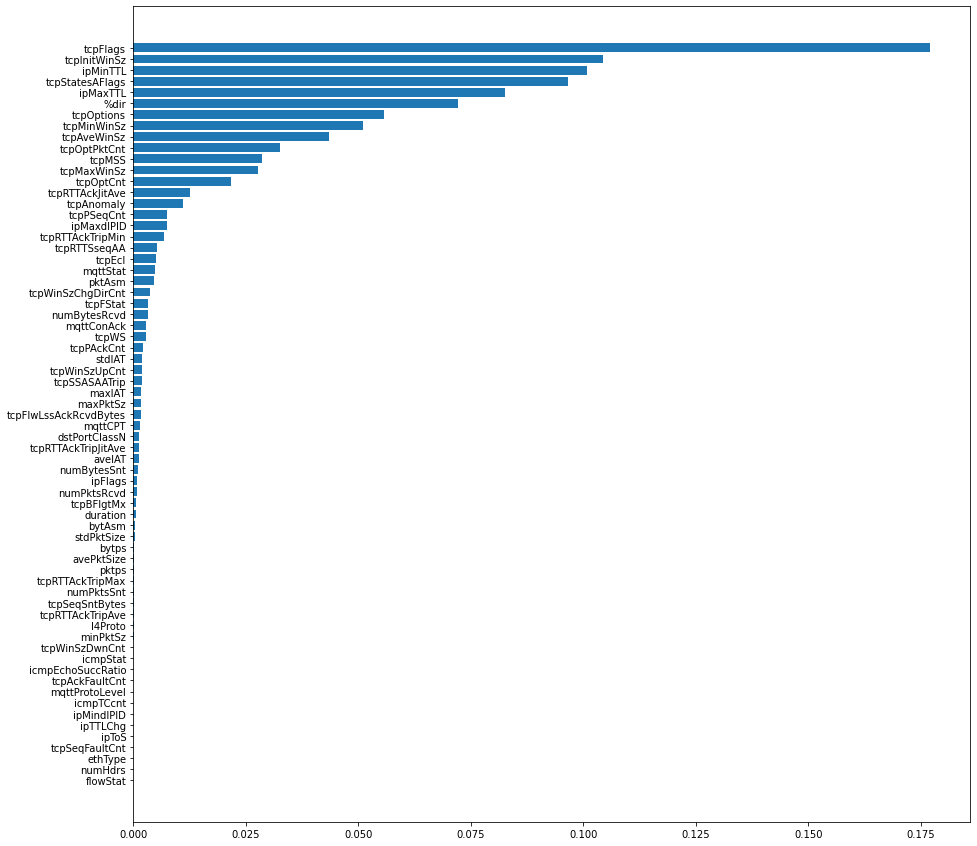

In [35]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,15))
plt.barh(sampled_main_df_cols[sorted_idx],clf.feature_importances_[sorted_idx])

In [36]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf', C=1,gamma='auto')
start = time.time()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
end = time.time()
print(end - start, "seconds")
print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average = 'weighted'),recall_score(y_test, y_pred, average = 'weighted'),f1_score(y_test, y_pred, average = 'macro'))
print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average = 'weighted'),recall_score(y_test, y_pred, average = 'weighted'),f1_score(y_test, y_pred, average = 'weighted'))
print(classification_report(y_test, y_pred))

2.807600259780884 seconds
0.9977574785005966 0.9977686685227278 0.9977574785005966 0.9977332322251117
0.9977574785005966 0.9977686685227278 0.9977574785005966 0.9977580042304609
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26871
           1       1.00      1.00      1.00     21735

    accuracy                           1.00     48606
   macro avg       1.00      1.00      1.00     48606
weighted avg       1.00      1.00      1.00     48606



In [37]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
start = time.time()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
end = time.time()
print(end - start, "seconds")
print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average = 'weighted'),recall_score(y_test, y_pred, average = 'weighted'),f1_score(y_test, y_pred, average = 'macro'))
print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average = 'weighted'),recall_score(y_test, y_pred, average = 'weighted'),f1_score(y_test, y_pred, average = 'weighted'))
print(classification_report(y_test, y_pred))

0.0765376091003418 seconds
0.9877587129161008 0.9877774335582118 0.9877587129161008 0.9876269973154292
0.9877587129161008 0.9877774335582118 0.9877587129161008 0.9877618908996864
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     26871
           1       0.98      0.99      0.99     21735

    accuracy                           0.99     48606
   macro avg       0.99      0.99      0.99     48606
weighted avg       0.99      0.99      0.99     48606



In [38]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=100)
start = time.time()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
end = time.time()
print(end - start, "seconds")
print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average = 'weighted'),recall_score(y_test, y_pred, average = 'weighted'),f1_score(y_test, y_pred, average = 'macro'))
print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average = 'weighted'),recall_score(y_test, y_pred, average = 'weighted'),f1_score(y_test, y_pred, average = 'weighted'))
print(classification_report(y_test, y_pred))

8.2736976146698 seconds
0.9988067316792165 0.9988099074495377 0.9988067316792165 0.9987935639792149
0.9988067316792165 0.9988099074495377 0.9988067316792165 0.9988068820783108
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26871
           1       1.00      1.00      1.00     21735

    accuracy                           1.00     48606
   macro avg       1.00      1.00      1.00     48606
weighted avg       1.00      1.00      1.00     48606



In [39]:
from xgboost import XGBClassifier
clf = XGBClassifier()
start = time.time()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
end = time.time()
print(end - start, "seconds")
print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average = 'weighted'),recall_score(y_test, y_pred, average = 'weighted'),f1_score(y_test, y_pred, average = 'macro'))
print(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average = 'weighted'),recall_score(y_test, y_pred, average = 'weighted'),f1_score(y_test, y_pred, average = 'weighted'))
print(classification_report(y_test, y_pred))

2.2505457401275635 seconds
0.9994856602065588 0.9994862511300349 0.9994856602065588 0.9994799096377718
0.9994856602065588 0.9994862511300349 0.9994856602065588 0.9994856883349523
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26871
           1       1.00      1.00      1.00     21735

    accuracy                           1.00     48606
   macro avg       1.00      1.00      1.00     48606
weighted avg       1.00      1.00      1.00     48606

